In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [82]:
richNeighbourhoods = 3
poorNeighbourhoods = 10
richPeople = 20000
poorPeople = 30000

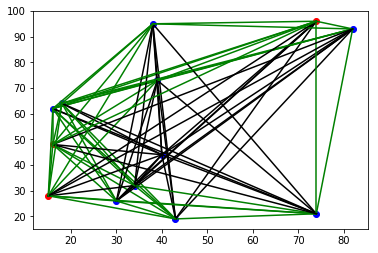

In [122]:
def generateNeighbourhoods(nNeighbourhoods):
    x = np.random.randint(0,101,nNeighbourhoods)
    y = np.random.randint(0,101,nNeighbourhoods)
    return x,y

x,y = generateNeighbourhoods(poorNeighbourhoods)
xr,yr = generateNeighbourhoods(richNeighbourhoods)
plt.plot(x,y,'bo')
plt.plot(xr,yr,'ro')

x = np.append(x,xr)
y = np.append(y,yr)

def intersects(x,y,p1,p2,cx,cy,cr):
    x1, x2 = x[p1], x[p2]
    y1, y2 = y[p1], y[p2]
    x1 -= cx
    x2 -= cx
    y1 -= cy
    y2 -= cy
    dx = x2 - x1
    dy = y2 - y1
    dr_squared = dx**2 + dy**2
    D = x1*y2 - x2*y1
    return cr**2 * dr_squared > D**2

def connect(x,y,p1,p2,color='k'):
    x1, x2 = x[p1], x[p2]
    y1, y2 = y[p1], y[p2]
    plt.plot([x1,x2],[y1,y2],color+'-')

def drawRoutes(x,y):
    for i in range(0,len(x)):
        for j in range(i,len(x)):
            if(intersects(x,y,i,j,50,50,20)):
                connect(x,y,i,j,color='k')
            else:
                connect(x,y,i,j,color='g')

#graph is complete so all edges are n(n-1)/2 -> complexity for checking if an agent
#could visit the shop is O(n^2) in space and O(n^2) in time lookup(table)
#total time complexity should be O(n^2*iterations)

neighbours = {x:list(range(richNeighbourhoods+poorNeighbourhoods)) for x in range(richNeighbourhoods+poorNeighbourhoods)}
direction_probability = np.full(richNeighbourhoods+poorNeighbourhoods,1/(richNeighbourhoods+poorNeighbourhoods))
stationary_distribution = np.append(np.full(poorNeighbourhoods,20),np.full(richNeighbourhoods,100))
states = richNeighbourhoods + poorNeighbourhoods

#Metropolis-Hastings
def MetropolisHastings():
    MH_mat = np.zeros((states,states))
    proposal_mat = np.zeros((states,states))

    #could be inserted in above algorithm for speedup
    for state,adjacent in zip(neighbours.keys(),neighbours.values()):
        for direction in range(len(neighbours.keys())):
            proposal_mat[state,adjacent[direction]] += direction_probability[direction]

    for state,adjacent in zip(neighbours.keys(),neighbours.values()):
        accept_probability = 0.0 #the probability to move to any of the neighbouring states
        for direction in range(len(neighbours.keys())):
            if(adjacent[direction]!=state):
                acceptance_ratio = min(1, \
                    (stationary_distribution[adjacent[direction]]*proposal_mat[adjacent[direction],state])/ \
                    (stationary_distribution[state]*proposal_mat[state,adjacent[direction]]))
                transition_probability = direction_probability[direction]*acceptance_ratio
                accept_probability += transition_probability
                MH_mat[state,adjacent[direction]] = transition_probability
        MH_mat[state,state] = 1-accept_probability
    return MH_mat,proposal_mat

MHrich,proposal = MetropolisHastings()

def step(state, markovMat):
    nextState = np.random.choice()
    return nextState
#1) check which pairs of points cross the shop add in loopup table -> O(n^2)
#2) start simulation
#  2.1) make a step in the markov chain for each agent
#  2.2) in each iteration check if the agent moving from point A to point B "sees the shop"
        
def price(x,y,px,py):
    return

drawRoutes(x,y)

agent_rich_state = np.random.randint(0,richNeighbourhoods,richPeople)
agent_poor_state = np.random.randint(0,poorNeighbourhoods,poorPeople)

In [120]:
proposal

array([[0.07692308, 0.07692308, 0.07692308, 0.07692308, 0.07692308,
        0.07692308, 0.07692308, 0.07692308, 0.07692308, 0.07692308,
        0.07692308, 0.07692308, 0.07692308],
       [0.07692308, 0.07692308, 0.07692308, 0.07692308, 0.07692308,
        0.07692308, 0.07692308, 0.07692308, 0.07692308, 0.07692308,
        0.07692308, 0.07692308, 0.07692308],
       [0.07692308, 0.07692308, 0.07692308, 0.07692308, 0.07692308,
        0.07692308, 0.07692308, 0.07692308, 0.07692308, 0.07692308,
        0.07692308, 0.07692308, 0.07692308],
       [0.07692308, 0.07692308, 0.07692308, 0.07692308, 0.07692308,
        0.07692308, 0.07692308, 0.07692308, 0.07692308, 0.07692308,
        0.07692308, 0.07692308, 0.07692308],
       [0.07692308, 0.07692308, 0.07692308, 0.07692308, 0.07692308,
        0.07692308, 0.07692308, 0.07692308, 0.07692308, 0.07692308,
        0.07692308, 0.07692308, 0.07692308],
       [0.07692308, 0.07692308, 0.07692308, 0.07692308, 0.07692308,
        0.07692308, 0.07692

In [85]:
direction_probability

array([0.07692308, 0.07692308, 0.07692308, 0.07692308, 0.07692308,
       0.07692308, 0.07692308, 0.07692308, 0.07692308, 0.07692308,
       0.07692308, 0.07692308, 0.07692308])

In [91]:
agent_poor_state

array([4, 5, 1, ..., 1, 7, 2])

In [87]:
MHrich

array([[0.07692308, 0.07692308, 0.07692308, 0.07692308, 0.07692308,
        0.07692308, 0.07692308, 0.07692308, 0.07692308, 0.07692308,
        0.07692308, 0.07692308, 0.07692308],
       [0.07692308, 0.07692308, 0.07692308, 0.07692308, 0.07692308,
        0.07692308, 0.07692308, 0.07692308, 0.07692308, 0.07692308,
        0.07692308, 0.07692308, 0.07692308],
       [0.07692308, 0.07692308, 0.07692308, 0.07692308, 0.07692308,
        0.07692308, 0.07692308, 0.07692308, 0.07692308, 0.07692308,
        0.07692308, 0.07692308, 0.07692308],
       [0.07692308, 0.07692308, 0.07692308, 0.07692308, 0.07692308,
        0.07692308, 0.07692308, 0.07692308, 0.07692308, 0.07692308,
        0.07692308, 0.07692308, 0.07692308],
       [0.07692308, 0.07692308, 0.07692308, 0.07692308, 0.07692308,
        0.07692308, 0.07692308, 0.07692308, 0.07692308, 0.07692308,
        0.07692308, 0.07692308, 0.07692308],
       [0.07692308, 0.07692308, 0.07692308, 0.07692308, 0.07692308,
        0.07692308, 0.07692

In [88]:
np.sum(agent_rich_state)

20007

In [103]:
intersects(0,0,0,1,1,1,1)

False

In [104]:
'a' + 'b'

'ab'